<a href="https://colab.research.google.com/github/wissemkarous/Lip-reading-Final-Year-Project-/blob/main/Final_Year_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ffmpeg -i '/content/bbaf2n.mpg' '/content/bbaf2n.mp4'


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!pip install dlib --upgrade


In [ ]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))



In [ ]:
import cv2
print(cv2.data.haarcascades)


/usr/local/lib/python3.10/dist-packages/cv2/data/


In [ ]:
face_cascade_path = '/usr/share/opencv/haarcascades/haarcascade_frontalface_default.xml'
mouth_cascade_path = '/content/haarcascade_frontalface_default.xml'

face_cascade = cv2.CascadeClassifier(face_cascade_path)
mouth_cascade = cv2.CascadeClassifier(mouth_cascade_path)


Exctract mouth shapes from videoframes and save them into /content/mouth_shapes

In [47]:
import cv2
import os

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the video file
cap = cv2.VideoCapture('/content/bbaf2n.mp4')

# Create a folder to store mouth shapes
output_folder = 'mouth_shapes'
os.makedirs(output_folder, exist_ok=True)

frame_count = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply background subtraction (you may need to fine-tune parameters)
    fgmask = cv2.bgsegm.createBackgroundSubtractorMOG().apply(gray)

    # Use face detection to locate the face
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the lip region (you may need to fine-tune coordinates)
        lip_region = frame[y + h//2:y + h, x:x + w]

        # Save the lip region as an image
        output_path = os.path.join(output_folder, f"mouth_{frame_count}.png")
        cv2.imwrite(output_path, lip_region)

        frame_count += 1

    # Break the loop if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


Extract mouth shape :

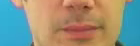

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the video file
cap = cv2.VideoCapture('/content/bbaf2n.mp4')

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply background subtraction (you may need to fine-tune parameters)
    fgmask = cv2.bgsegm.createBackgroundSubtractorMOG().apply(gray)

    # Use face detection to locate the face
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the lip region (you may need to fine-tune coordinates)
        lip_region = frame[y + h//2:y + h, x:x + w]

        # Display the lip region

        cv2_imshow(lip_region)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()


In [48]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Construct the WAV file path based on the MP3 file path.

In [62]:
from pydub import AudioSegment
import simpleaudio as sa
import os

# Path to your MP3 file
mp3_file_path = '/content/path/to/output/audio.mp3'

# Load the MP3 file
audio = AudioSegment.from_mp3(mp3_file_path)

# Create the WAV file path in the same directory
wav_file_path = os.path.splitext(mp3_file_path)[0] + '.wav'

# Export as WAV file
audio.export(wav_file_path, format='wav')

# Load the WAV file for playback
wave_obj = sa.WaveObject.from_wave_file(wav_file_path)





Read audio after change from .mp3 to .wave

In [49]:
from thinkdsp import read_wave

wave = read_wave('/content/path/to/output/audio.wav')
wave.normalize()
wave.make_audio()

Plot the spectrum

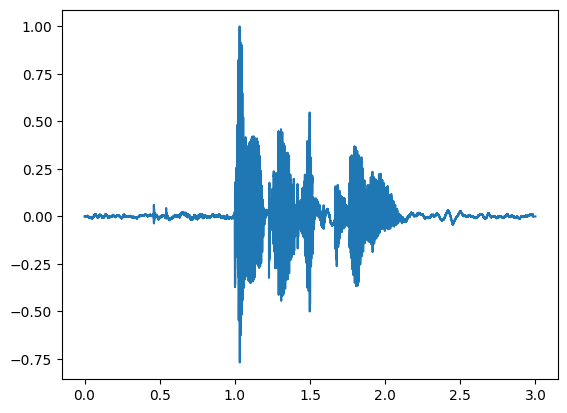

In [53]:
wave.plot()

The spectrogram

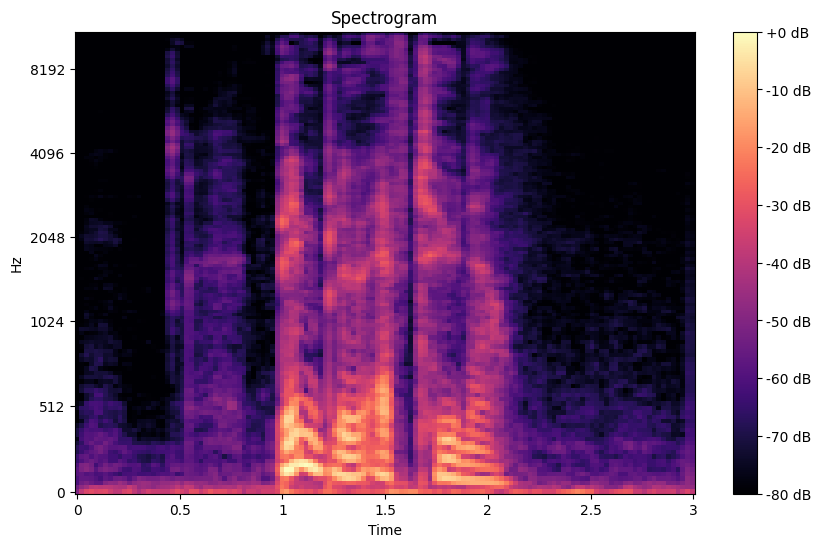

In [64]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Path to your audio file
audio_file_path = '/content/path/to/output/audio.mp3'

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Create a spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to decibels (log scale)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models


Build the CNN Model: